# Projeto 5

#### Gabriel Noal
___

## Introdução

####        Este trabalho tem como objetivo analisar se anos médios de estudos e a expectativa de vida afeta no índice de percepção da corrupção através de regressão e com bases de dados de 2009.

In [1]:
%matplotlib inline
#%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
import math
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D

import statsmodels.api as sm1
import statsmodels.formula.api as sm

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\gabri\Documents\INSPER\Ciencia dos Dados\DP\CD1S17\Projeto 5


In [2]:
expec = pd.read_excel('indicator life_expectancy_at_birth.xlsx',index_col=0)
cpi = pd.read_excel('indicator ti cpi 2009.xlsx',index_col=0)
school = pd.read_excel('Years in school men 25 plus.xlsx',index_col=0)

In [3]:
dados = pd.concat([expec,school,cpi],axis=1,join="inner")
dados.columns = ["Exp_de_vida","Anos_de_estudo","CPI"]

In [4]:
dados = dados.dropna()


In [5]:
print("Análise descritiva de Expectativa de vida")
print(dados.Exp_de_vida.describe())
print()
print("Análise descritiva de Anos médio de estudos")
print(dados.Anos_de_estudo.describe())
print()
print("Análise descritiva do índice de percepção da corrupção")
print(dados.CPI.describe())
print()

Análise descritiva de Expectativa de vida
count    159.000000
mean      69.898113
std        8.945634
min       45.500000
25%       62.350000
50%       72.100000
75%       77.350000
max       82.700000
Name: Exp_de_vida, dtype: float64

Análise descritiva de Anos médio de estudos
count    159.000000
mean       8.181761
std        3.151991
min        1.500000
25%        5.700000
50%        8.200000
75%       11.150000
max       14.200000
Name: Anos_de_estudo, dtype: float64

Análise descritiva do índice de percepção da corrupção
count    159.000000
mean       3.932075
std        2.073623
min        1.100000
25%        2.450000
50%        3.200000
75%        4.700000
max        9.300000
Name: CPI, dtype: float64



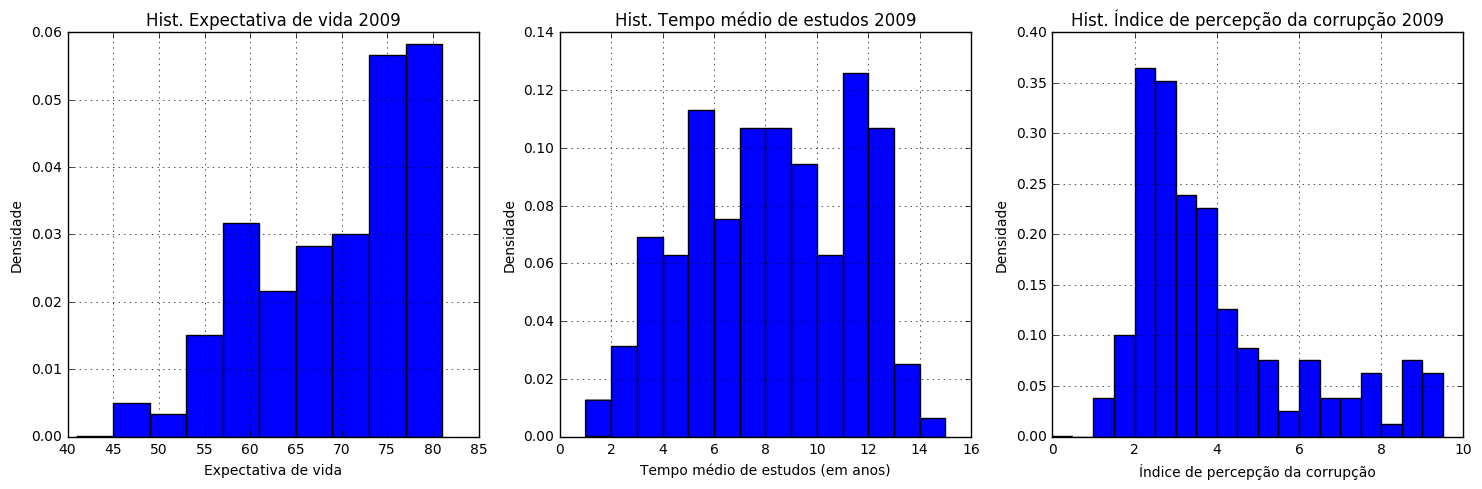

In [6]:
fig = plt.figure(figsize=(15,5))

plt.subplot(131)
dados.Exp_de_vida.hist(bins=range(41,84,4),normed=1)
plt.xlabel("Expectativa de vida")
plt.ylabel("Densidade")
plt.title("Hist. Expectativa de vida 2009")


plt.subplot(132)
dados.Anos_de_estudo.hist(bins=range(1,16,1),normed=1)
plt.xlabel("Tempo médio de estudos (em anos)")
plt.ylabel("Densidade")
plt.title("Hist. Tempo médio de estudos 2009")

plt.subplot(133)
dados.CPI.hist(bins=np.arange(0,10,0.5),normed=1)
plt.xlabel("Índice de percepção da corrupção")
plt.ylabel("Densidade")
plt.title("Hist. Índice de percepção da corrupção 2009")


plt.tight_layout()
plt.show()

Ajuste linear entre Expectativa de vida e Índice de percepção da corrupção: 0.03409109697133348 x -1.1339840630890543
Coeficiente angular: 0.0340910969713
Coeficiente linear: -1.13398406309

Ajuste linear entre Tempo médio de estudos e Índice de percepção da corrupção: 0.08957981650555924 x + 0.5159986427469467
Coeficiente angular: 0.0895798165056
Coeficiente linear: 0.515998642747


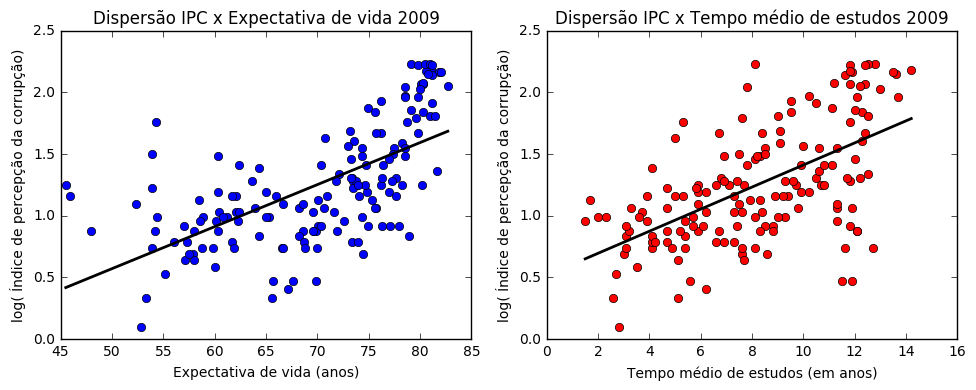

In [7]:
fig = plt.figure(figsize=(10,4))


#a = Mundo.X3.cov(Mundo.X4) / Mundo.X3.var()
#b = Mundo.X4.mean() - a*Mundo.X3.mean()


plt.subplot(121)
a = dados.Exp_de_vida.cov(np.log(dados.CPI)) / dados.Exp_de_vida.var()
b = np.log(dados.CPI).mean() - a*dados.Exp_de_vida.mean()

plt.plot(dados.Exp_de_vida,np.log(dados.CPI),"o")
plt.xlabel("Expectativa de vida (anos)")
plt.ylabel("log( Índice de percepção da corrupção)")
plt.title("Dispersão IPC x Expectativa de vida 2009")
plt.plot((dados.Exp_de_vida.min(), dados.Exp_de_vida.max()), (a*dados.Exp_de_vida.min()+b, a*dados.Exp_de_vida.max()+b), color='black',linewidth=2)

print('Ajuste linear entre Expectativa de vida e Índice de percepção da corrupção: {0} x {1}'.format(a,b))
print('Coeficiente angular:', a)
print('Coeficiente linear:', b)


plt.subplot(122)
a = dados.Anos_de_estudo.cov(np.log(dados.CPI)) / dados.Anos_de_estudo.var()
b = np.log(dados.CPI).mean() - a*dados.Anos_de_estudo.mean()

plt.plot(dados.Anos_de_estudo,np.log(dados.CPI),"o",color="red")
plt.ylabel("log( Índice de percepção da corrupção)")
plt.xlabel("Tempo médio de estudos (em anos)")
plt.title("Dispersão IPC x Tempo médio de estudos 2009")
plt.plot((dados.Anos_de_estudo.min(), dados.Anos_de_estudo.max()), (a*dados.Anos_de_estudo.min()+b, a*dados.Anos_de_estudo.max()+b), color='black',linewidth=2)
print()
print('Ajuste linear entre Tempo médio de estudos e Índice de percepção da corrupção: {0} x + {1}'.format(a,b))
print('Coeficiente angular:', a)
print('Coeficiente linear:', b)



plt.tight_layout()
plt.show()

In [8]:
#Linear Regression

Y = dados.CPI
Y_log = np.log(Y)
X = dados[["Anos_de_estudo","Exp_de_vida"]]

model = sm.ols(formula= "CPI ~ Anos_de_estudo + Exp_de_vida", data=dados)
est = model.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CPI   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     61.62
Date:                Tue, 30 May 2017   Prob (F-statistic):           1.90e-20
Time:                        14:32:17   Log-Likelihood:                -294.78
No. Observations:                 159   AIC:                             595.6
Df Residuals:                     156   BIC:                             604.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -4.5034      1.058     -4.256      0.000        -6.594    -2.413
Anos_de_estudo     0.2061      0.052      3.979      0.000         0.104     0.308
Exp_de_vida        0.0966      0.018      5.290      0.000         0.061     0.133
==============================================================================
Omnibus:                        6.700   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                6.959
Skew:                           0.500   Prob(JB):                       0.0308
Kurtosis:                       2.774   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>


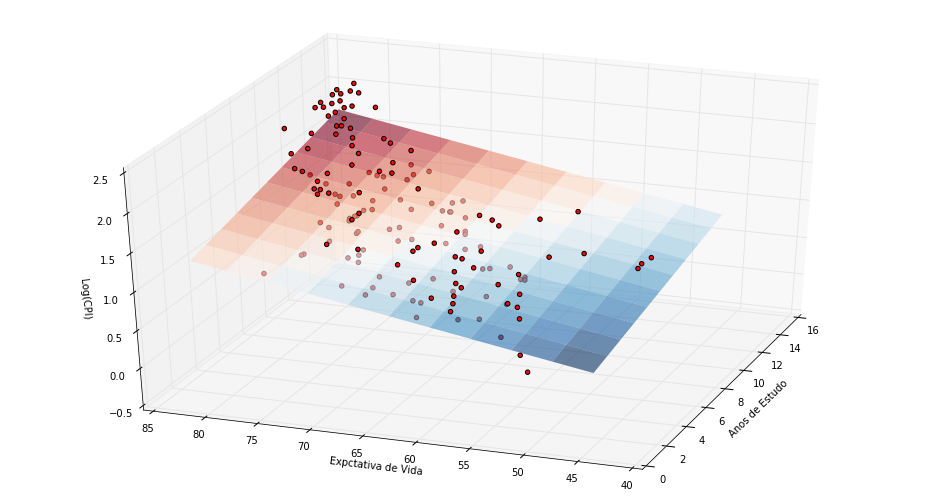

In [19]:
%matplotlib notebook
X = sm1.add_constant(X)
est= sm1.OLS(Y_log,X).fit()

xx1, xx2 =np.meshgrid(np.linspace(X.Anos_de_estudo.min(),X.Anos_de_estudo.max(),100),np.linspace(X.Exp_de_vida.min(),X.Exp_de_vida.max(),100))
Z = est.params[0] + est.params[1] *xx1 + est.params[2]*xx2

fig = plt.figure(figsize=(13,7))
ax = Axes3D(fig, azim = -115, elev =15)

surf = ax.plot_surface(xx1,xx2,Z,cmap=plt.cm.RdBu_r, alpha =0.6, linewidth = 0)
resid = Y_log - est.predict(X)

ax.scatter(X[resid >= 0].Anos_de_estudo, X[resid >= 0].Exp_de_vida, Y_log[resid >= 0], c='r', alpha =1, facecolor ='white', marker='o')
ax.scatter(X[resid < 0].Anos_de_estudo, X[resid < 0].Exp_de_vida, Y_log[resid < 0], c='r', alpha =1, marker='o')


ax.set_xlabel('Anos de Estudo')
ax.set_ylabel('Expctativa de Vida')
ax.set_zlabel('Log(CPI)')

plt.show()